# Importing the Necessary libraries



In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Loading the Dataset

In [31]:
data=pd.read_csv(r"C:\Users\Home\OneDrive\Desktop\Gluco-Sense\diabetes.csv")
print(data)

     age  gender  polyuria  polydipsia  sudden_weight_loss  weakness  \
0     40    Male         0           1                   0         1   
1     58    Male         0           0                   0         1   
2     41    Male         1           0                   0         1   
3     45    Male         0           0                   1         1   
4     60    Male         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
515   39  Female         1           1                   1         0   
516   48  Female         1           1                   1         1   
517   58  Female         1           1                   1         1   
518   32  Female         0           0                   0         1   
519   42    Male         0           0                   0         0   

     polyphagia  genital_thrush  visual_blurring  itching  irritability  \
0             0               0                0        1   

# EDA Process

## Data Overview

In [32]:
print("First Few Rows:")
print(data.head())

print("\nDataset Info:")
data.info()

print("\nShape of Dataset:", data.shape)


First Few Rows:
   age gender  polyuria  polydipsia  sudden_weight_loss  weakness  polyphagia  \
0   40   Male         0           1                   0         1           0   
1   58   Male         0           0                   0         1           0   
2   41   Male         1           0                   0         1           1   
3   45   Male         0           0                   1         1           1   
4   60   Male         1           1                   1         1           1   

   genital_thrush  visual_blurring  itching  irritability  delayed_healing  \
0               0                0        1             0                1   
1               0                1        0             0                0   
2               0                0        1             0                1   
3               1                0        1             0                1   
4               0                1        1             1                1   

   partial_paresis  muscle_s

### Insights:
**First Rows:** Show a sample of the data to understand its structure and values.

**Shape:** The dataset contains 520 rows and 17 columns.

**Data Types:** There is 1 categorical column (gender) and 16 numerical columns.

## Missing Values

In [33]:
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
Diabetic              0
dtype: int64


 No missing values in the dataset, ensuring a complete analysis.

## Checking for Duplicates

In [34]:
# Check for duplicates
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 269


**data.duplicated():** Identifies duplicate rows.

**duplicates.sum():** Counts the total number of duplicate rows.

## Dropping Duplicates

In [35]:
# Drop duplicates
data_cleaned = data.drop_duplicates()

# Confirm the shape after dropping duplicates
print("Shape before dropping duplicates:", data.shape)
print("Shape after dropping duplicates:", data_cleaned.shape)


Shape before dropping duplicates: (520, 17)
Shape after dropping duplicates: (251, 17)


**data.drop_duplicates():** Removes duplicate rows and creates a new DataFrame (data_cleaned).

The shape before and after ensures duplicates have been removed.


In [36]:
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})

# Verify the transformation
print(data['gender'].head())


0    1
1    1
2    1
3    1
4    1
Name: gender, dtype: int64


In [37]:
data.to_csv('cleaned_diabetes.csv', index=False)

## Visualization: Univariate Analysis
**You can visualize the distributions of numerical features and categorical features to understand their spread.**

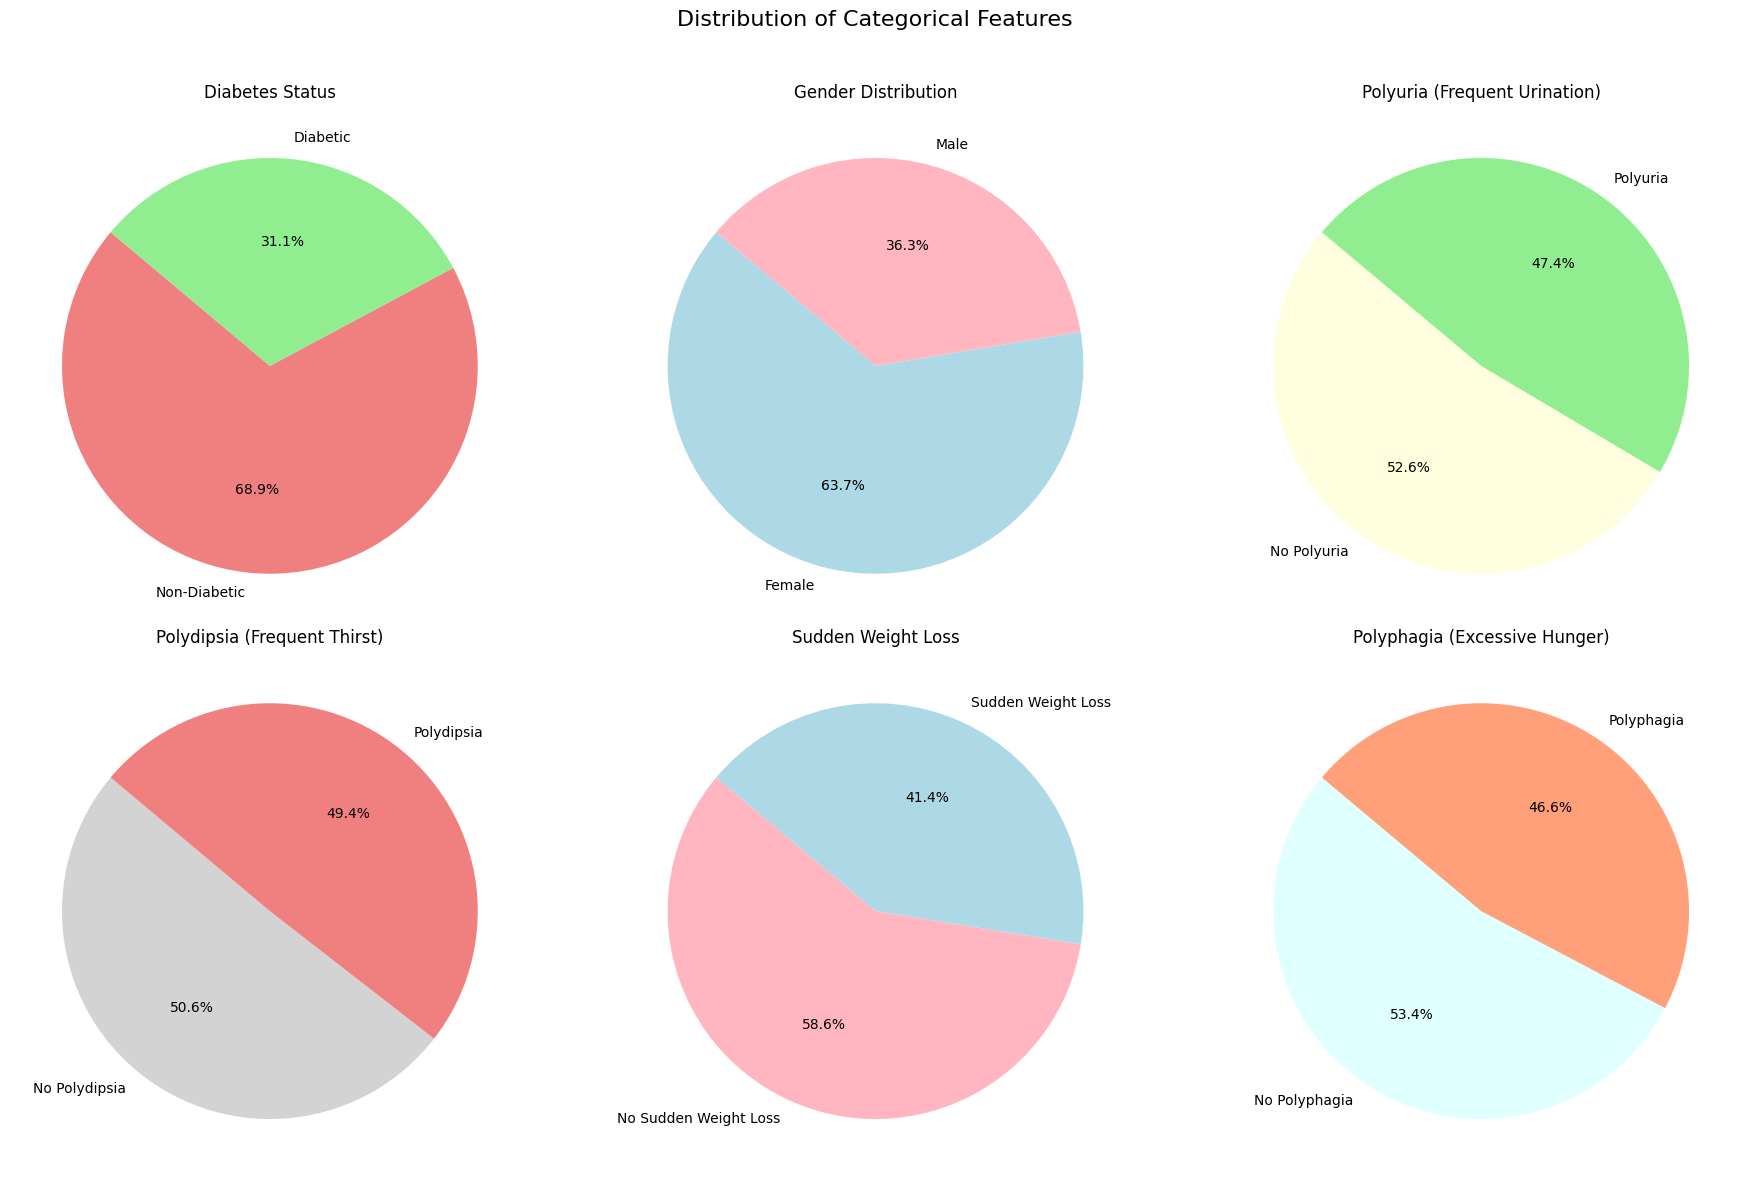

In [38]:
import matplotlib.pyplot as plt

# Set up the subplots grid (2 rows, 3 columns for 6 pie charts)
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Pie chart for Diabetes Status
diabetes_counts = data_cleaned['Diabetic'].value_counts()
diabetes_labels = ['Non-Diabetic', 'Diabetic']
axs[0, 0].pie(diabetes_counts, labels=diabetes_labels, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], startangle=140)
axs[0, 0].set_title("Diabetes Status")

# Pie chart for Gender Distribution
gender_counts = data_cleaned['gender'].value_counts()
gender_labels = ['Female', 'Male']
axs[0, 1].pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', colors=['lightblue', 'lightpink'], startangle=140)
axs[0, 1].set_title("Gender Distribution")

# Pie chart for Polyuria (Frequent Urination)
polyuria_counts = data_cleaned['polyuria'].value_counts()
polyuria_labels = ['No Polyuria', 'Polyuria']
axs[0, 2].pie(polyuria_counts, labels=polyuria_labels, autopct='%1.1f%%', colors=['lightyellow', 'lightgreen'], startangle=140)
axs[0, 2].set_title("Polyuria (Frequent Urination)")

# Pie chart for Polydipsia (Frequent Thirst)
polydipsia_counts = data_cleaned['polydipsia'].value_counts()
polydipsia_labels = ['No Polydipsia', 'Polydipsia']
axs[1, 0].pie(polydipsia_counts, labels=polydipsia_labels, autopct='%1.1f%%', colors=['lightgray', 'lightcoral'], startangle=140)
axs[1, 0].set_title("Polydipsia (Frequent Thirst)")

# Pie chart for Sudden Weight Loss
sudden_weight_loss_counts = data_cleaned['sudden_weight_loss'].value_counts()
sudden_weight_loss_labels = ['No Sudden Weight Loss', 'Sudden Weight Loss']
axs[1, 1].pie(sudden_weight_loss_counts, labels=sudden_weight_loss_labels, autopct='%1.1f%%', colors=['lightpink', 'lightblue'], startangle=140)
axs[1, 1].set_title("Sudden Weight Loss")

# Pie chart for Polyphagia (Excessive Hunger)
polyphagia_counts = data_cleaned['polyphagia'].value_counts()
polyphagia_labels = ['No Polyphagia', 'Polyphagia']
axs[1, 2].pie(polyphagia_counts, labels=polyphagia_labels, autopct='%1.1f%%', colors=['lightcyan', 'lightsalmon'], startangle=140)
axs[1, 2].set_title("Polyphagia (Excessive Hunger)")



# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Distribution of Categorical Features", fontsize=16)
plt.subplots_adjust(top=0.9)  # Adjust the title to fit
plt.show()



The combination of all pie charts will allow you to easily compare the distributions of different features such as gender, diabetes status, symptoms (polyuria, polydipsia, etc.).
You can identify any imbalances in the data, which could help you determine whether you need to address these issues (e.g., imbalanced classes for training models).

## Gender Distribution and Diabetes Status

**We can explore the gender distribution in relation to diabetes status.**

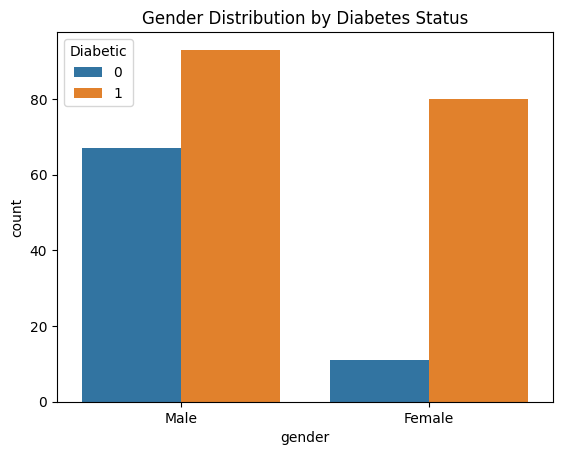

In [39]:
# Countplot for Gender vs. Diabetes
sns.countplot(x='gender', hue='Diabetic', data=data_cleaned)
plt.title("Gender Distribution by Diabetes Status")
plt.show()


**Gender Distribution:**
This countplot will show the breakdown of diabetes status (Diabetic) by gender.
We might see if diabetes is more prevalent in one gender compared to the other.
The plot may also reveal any imbalances between genders within the diabetic group.
According to Female, More Males are Diabetic.

## Bivariate Analysis: Age vs. Diabetes
You can examine the relationship between age and Diabetic.

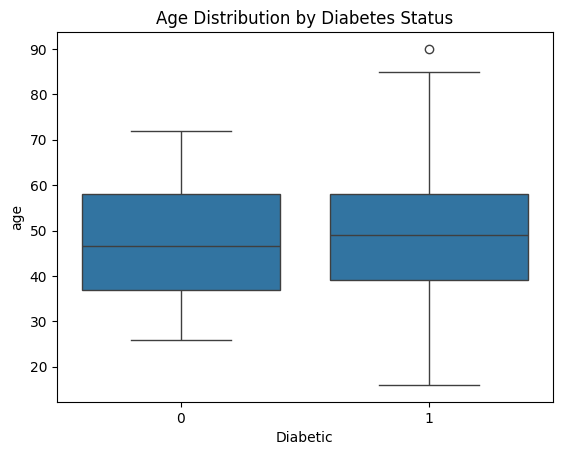

In [40]:
# Boxplot for Age vs. Diabetes
sns.boxplot(x='Diabetic', y='age', data=data_cleaned)
plt.title("Age Distribution by Diabetes Status")
plt.show()


**Boxplot for Age:**
The boxplot will display the distribution of age for both diabetic and non-diabetic individuals.
Typically, diabetic individuals may have a higher median age compared to non-diabetics.
Outliers or extreme age values may also be visible.

## Age Distribution by Diabetes Status and Gender
This analysis will provide deeper insights into how age varies with diabetes status across genders.

## 

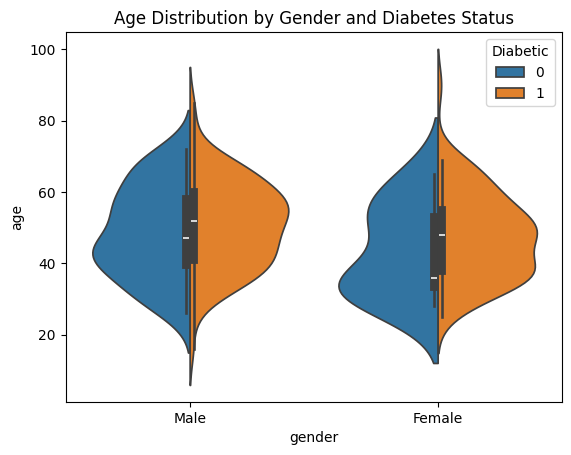

In [41]:
# Violin plot for age distribution by diabetes status and gender
sns.violinplot(x='gender', y='age', hue='Diabetic', data=data_cleaned, split=True)
plt.title("Age Distribution by Gender and Diabetes Status")
plt.show()


**Violin Plot:**

The plot will show how age distributions differ between diabetic and non-diabetic individuals for both males and females.
If the plot shows overlapping distributions for the diabetic vs. non-diabetic groups, it suggests that age alone may not be the strongest predictor for diabetes in this dataset.

**1. Age Distribution by Gender and Diabetes Status (Violin Plot):**

Both genders show a higher prevalence of diabetes (orange sections) in middle-aged to older individuals.

Non-diabetics (blue sections) are more evenly distributed across all age groups.

**Average Age:** 

Diabetic individuals have an average age of 49 years, while non-diabetics have an average of 46 years.

**Gender Distribution:**

The data does not indicate a significant gender-specific difference in diabetes prevalence.

This suggests age is a stronger contributing factor than gender for diabetes prevalence.


Diabetes predominantly affects middle-aged and older individuals, which aligns with the visual pattern in the plot.




## Class Distribution (Target Variable)
Understanding the distribution of the target variable (Diabetic) is essential for detecting imbalances that might affect model training.

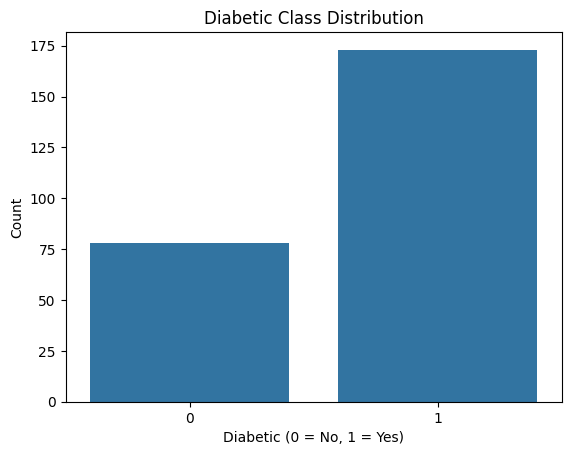

In [42]:
# Countplot for the target variable (Diabetic)
sns.countplot(x='Diabetic', data=data_cleaned)
plt.title("Diabetic Class Distribution")
plt.xlabel("Diabetic (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


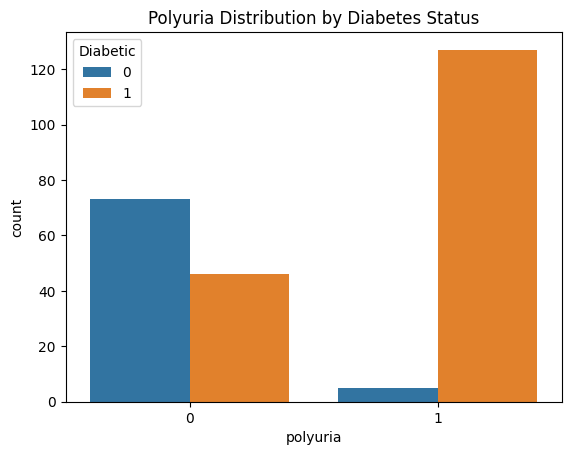

In [43]:
# Countplot for symptoms based on diabetes status
sns.countplot(x='polyuria', hue='Diabetic', data=data_cleaned)
plt.title("Polyuria Distribution by Diabetes Status")
plt.show()


# Feature Selection


## Outlier Detection and Handling
Outliers can impact model performance, so it's important to identify them.



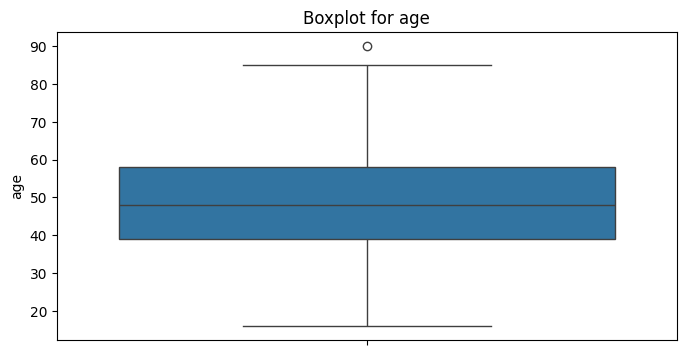

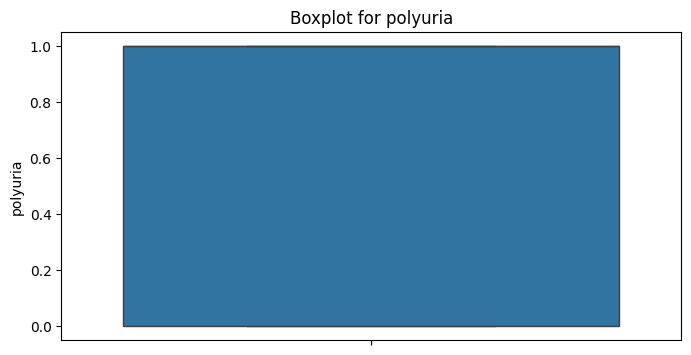

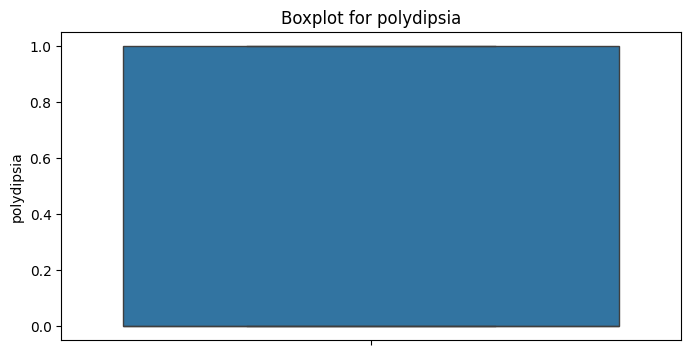

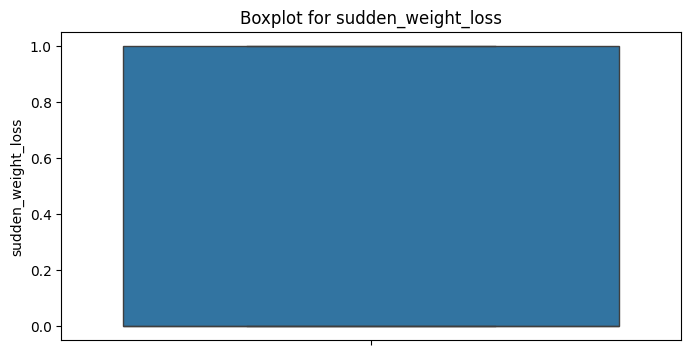

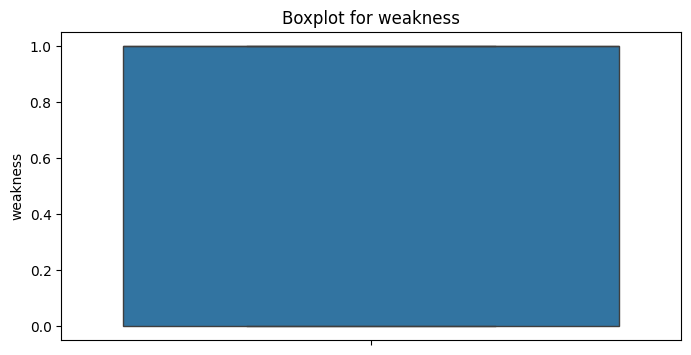

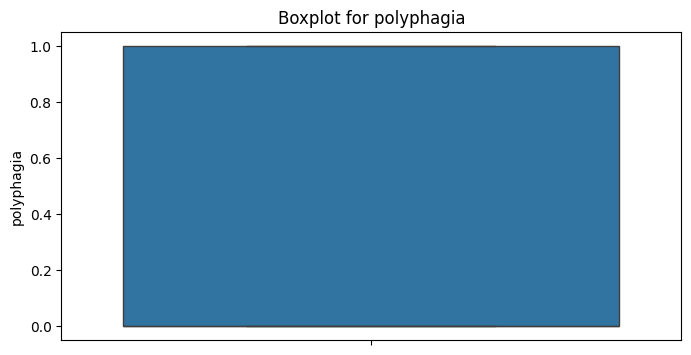

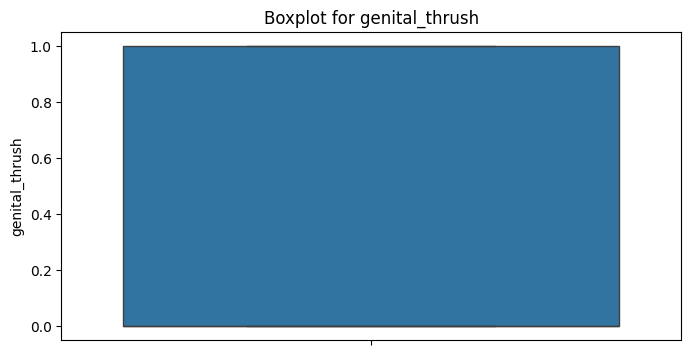

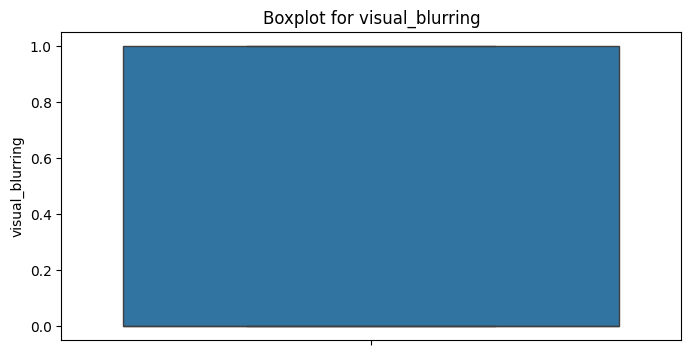

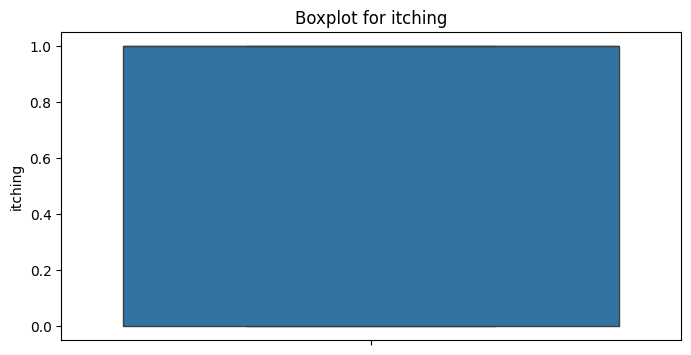

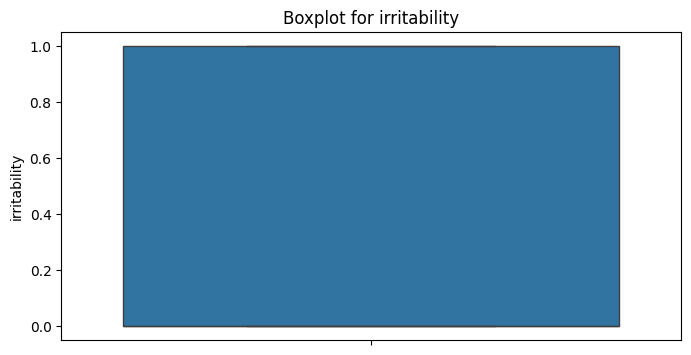

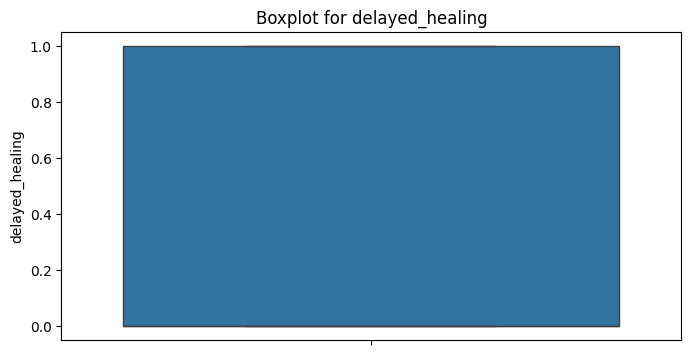

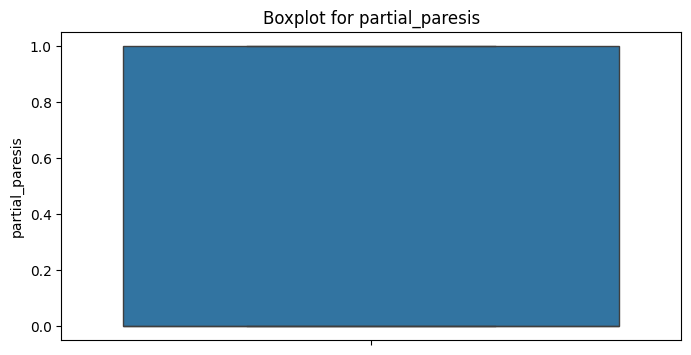

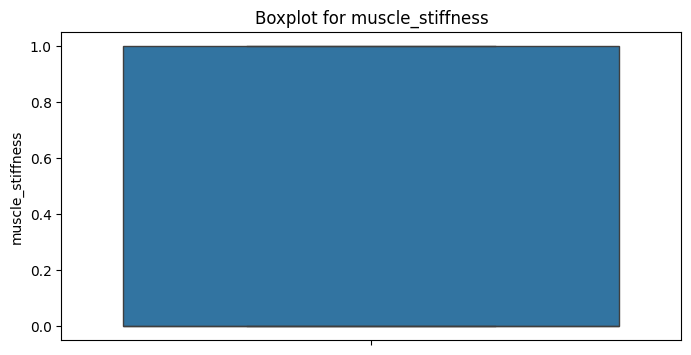

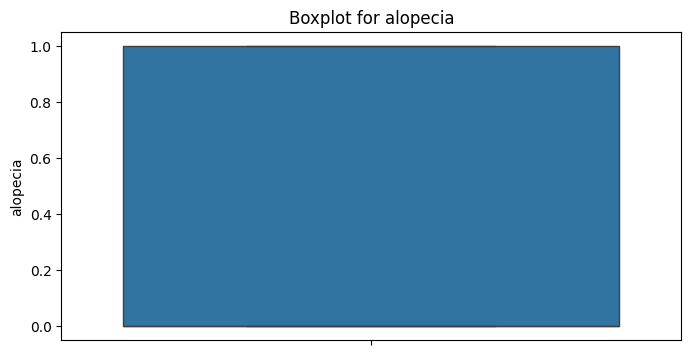

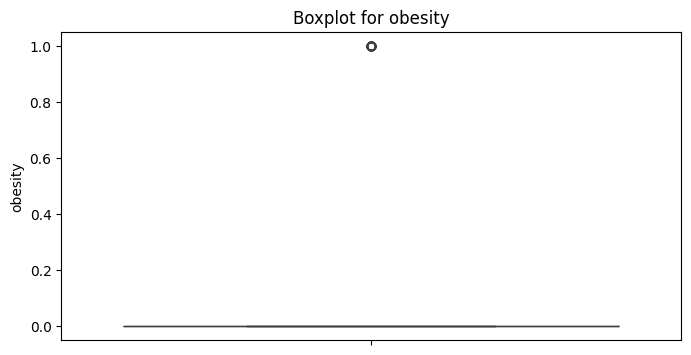

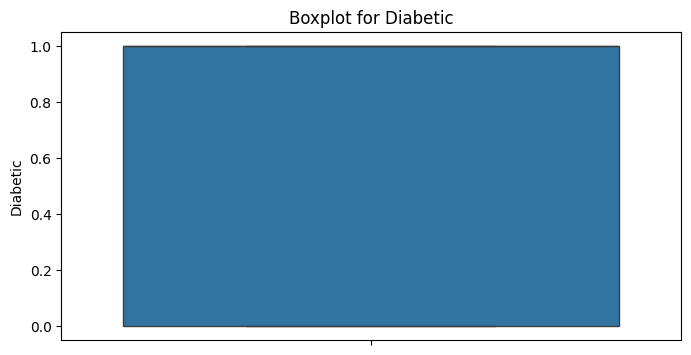

In [44]:
# Boxplot for numerical features to identify outliers
numerical_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data_cleaned[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


**Outliers:**
For numerical columns like age or glucose, boxplots will help identify extreme values (outliers).

For instance, extremely high or low glucose levels could be outliers that may need to be addressed in preprocessing (e.g., capping or removing).


## Dimensions Reduction


   age gender  polyuria  polydipsia  sudden_weight_loss  weakness  polyphagia  \
0   40   Male         0           1                   0         1           0   
1   58   Male         0           0                   0         1           0   
2   41   Male         1           0                   0         1           1   
3   45   Male         0           0                   1         1           1   
4   60   Male         1           1                   1         1           1   

   genital_thrush  visual_blurring  itching  irritability  delayed_healing  \
0               0                0        1             0                1   
1               0                1        0             0                0   
2               0                0        1             0                1   
3               1                0        1             0                1   
4               0                1        1             1                1   

   partial_paresis  muscle_stiffness  alopec

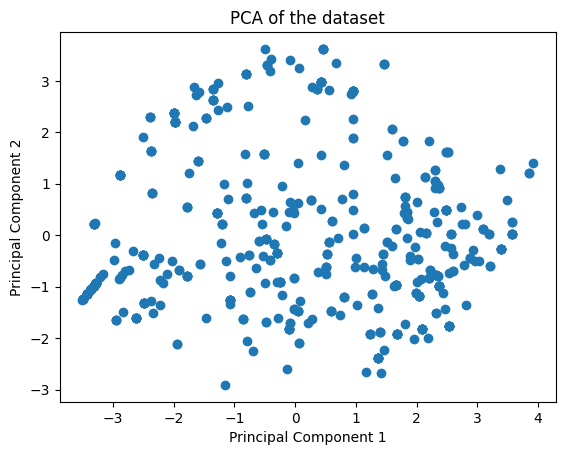

In [45]:

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset (if it's a CSV file)
data = pd.read_csv(r"C:\Users\Home\OneDrive\Desktop\Gluco-Sense\diabetes.csv")

# Preview the data
print(data.head())

# Clean the data by removing non-numeric columns or missing values if needed
# For example, if there are non-numeric columns like 'gender', drop them
data_cleaned = data.select_dtypes(include=['float64', 'int64'])  # Keep only numeric columns

# Standardize the data (PCA requires standardization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Print the explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Visualize the PCA result
import matplotlib.pyplot as plt
plt.scatter(pca_df['PCA1'], pca_df['PCA2'])
plt.title("PCA of the dataset")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



The dataset captures multiple symptoms (e.g., polyuria, polydipsia, weakness) and demographic details (age, gender) for individuals classified as diabetic or non-diabetic.

Binary encoding (0 and 1) is used for symptoms, while Diabetic serves as the target variable.

**Key Predictors:**

Features like polyuria (67% correlation) and polydipsia (65% correlation) have the strongest relationship with diabetes.

Non-diabetic individuals have lower average symptom scores, indicating clear separation between the two classes for certain features (e.g., sudden weight loss, partial paresis).

Gender is represented as a binary variable (Male, Female), and no significant bias toward either gender is apparent.

The PCA scatter plot reduces the dataset's dimensions into two components while retaining significant variance.

The points show some clustering, but there is noticeable overlap, suggesting moderate separability.

The explained variance ratio from PCA shows the first two components account for approximately 40% of the variance.

The overlap in clusters suggests that while symptoms like polyuria and polydipsia are strong predictors, the dataset has variability requiring multiple dimensions to achieve good classification accuracy.

This also indicates that while PCA is useful for visualization, other techniques or more components may be necessary for meaningful separation in the feature space.




## Correlation Between Symptoms and Diabetes
The correlation between symptoms (binary features) and the target variable Diabetic.

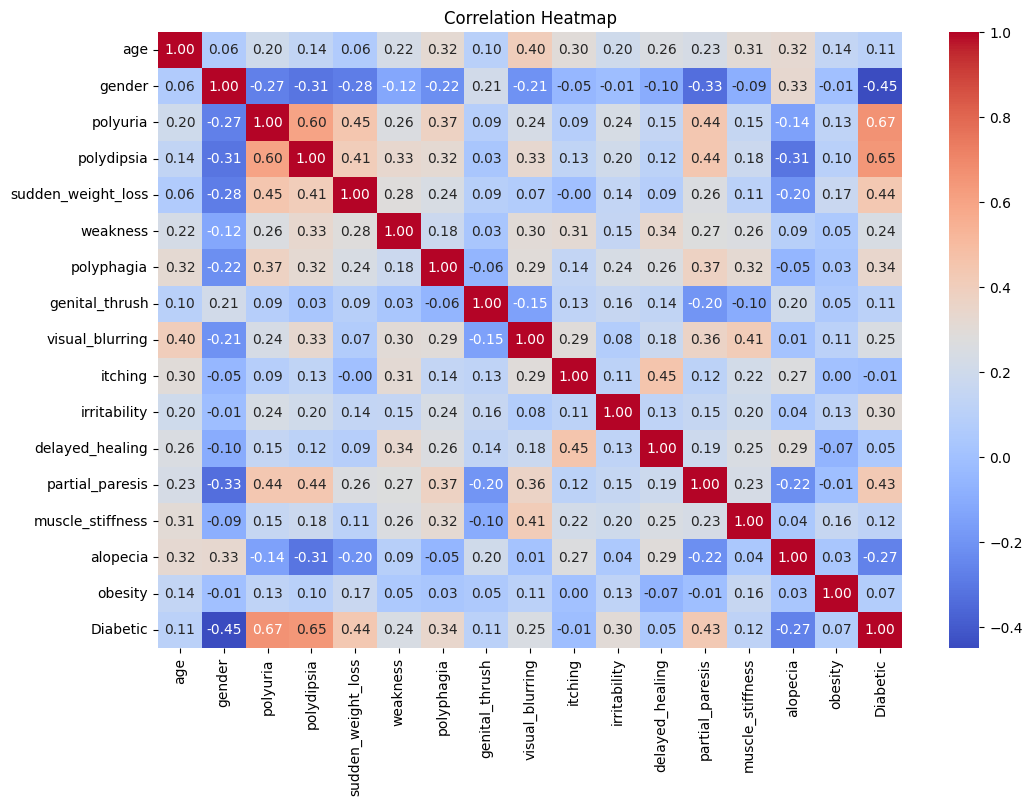

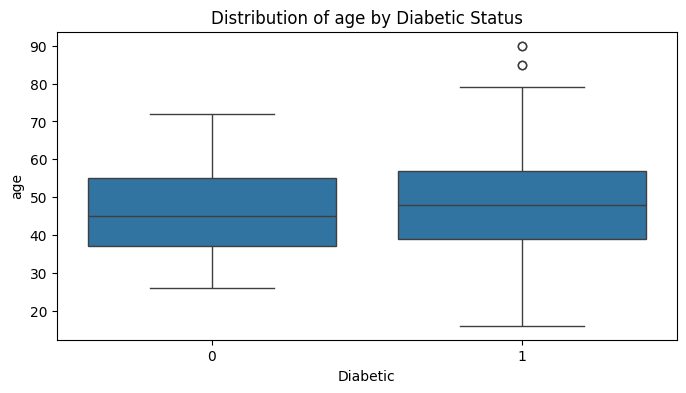

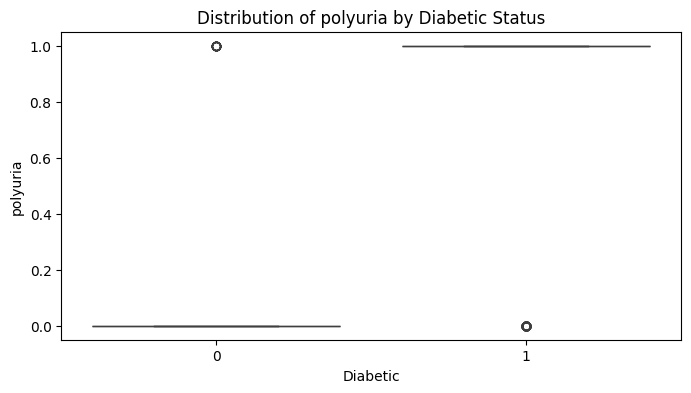

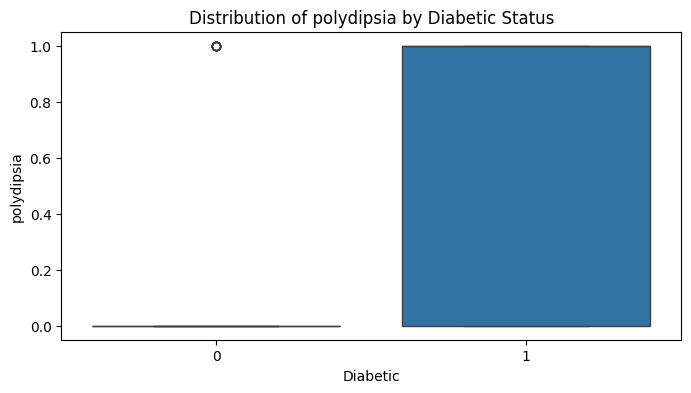

In [46]:
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Relationship with target (Diabetic)
for column in ['age', 'polyuria', 'polydipsia']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Diabetic', y=column, data=data)
    plt.title(f"Distribution of {column} by Diabetic Status")
    plt.show()



This is a correlation heatmap that shows the relationships between various clinical features, likely related to a diabetes diagnosis. Let's break down some key insights from the heatmap:

**1. Strong Correlation with Diabetes:**

Polyuria and Polydipsia are highly correlated with being diabetic, with correlation values of 0.67 and 0.65, respectively. This suggests that people with these symptoms are more likely to have diabetes.

Obesity also has a moderate correlation with diabetes (0.43), indicating a possible link between obesity and the likelihood of being diabetic.



**2. Symptoms with Diabetes:**

Symptoms like polydipsia (increased thirst), polyuria (increased urination), sudden weight loss, and weakness show moderate correlations with diabetes, which is typical for diabetes-related symptoms.



**3. Other Related Symptoms:**

Irritability and delayed healing seem to have moderate correlations with diabetes, indicating they may be common in diabetic individuals (with values of 0.45 and 0.43).

Muscle stiffness and alopecia show weak correlations with diabetes (0.16 and 0.12), suggesting a minor connection.



**4. Low Correlations:**

Genital thrush has very weak correlations with other factors (e.g., -0.06 with sudden weight loss and 0.15 with itching), indicating it might not be strongly related to the other symptoms or to diabetes itself.

Visual blurring has low correlations with most other symptoms, showing minimal associations with other clinical features.



**5. Gender:**

Gender shows weak correlations with most symptoms, indicating that the data doesn't suggest strong gender-based differences in the prevalence of symptoms.



**6. Symptoms Related to Diabetes:**

Polyphagia (increased hunger) has moderate correlations with symptoms like sudden weight loss (0.37) and weakness (0.34), which aligns with common diabetic symptoms, indicating a relationship with metabolic changes.




This heatmap provides valuable insights into the interconnections between various symptoms and diabetes, helping to identify which factors are most strongly related.

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Split the dataset into features (X) and target (y)
X = data_cleaned.drop(columns=['Diabetic'])  # Assuming 'Diabetic' is the target
y = data_cleaned['Diabetic']

# Convert categorical features into one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)  # Handle categorical variables

# Perform Chi-Square test
chi2_selector = SelectKBest(score_func=chi2, k='all')  # Use all features
chi2_selector.fit(X_encoded, y)

# Create a DataFrame for scores
feature_scores = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Chi-Square Score': chi2_selector.scores_
}).sort_values(by='Chi-Square Score', ascending=False)

print("Chi-Square Feature Scores:")
print(feature_scores)


Chi-Square Feature Scores:
               Feature  Chi-Square Score
2           polydipsia        120.785515
1             polyuria        116.184593
3   sudden_weight_loss         57.749309
11     partial_paresis         55.314286
9         irritability         35.334127
5           polyphagia         33.198418
13            alopecia         24.402793
0                  age         18.845767
7      visual_blurring         18.124571
4             weakness         12.724262
6       genital_thrush          4.914009
12    muscle_stiffness          4.875000
14             obesity          2.250284
10     delayed_healing          0.620188
8              itching          0.047826


## Key Insights:
**Highly Influential Features:**

The top features with the highest Chi-Square scores, indicating the strongest association with the target variable, are:

Polyuria (45.89)

Polydipsia (44.90)

Sudden Weight Loss (20.40)


**Features with moderate importance:**

Partial Paresis (18.04)

Polyphagia (13.45)

Irritability (13.01)

**Gender and Specific Symptoms:**

Gender_Male (8.71) indicates a noticeable association with the target variable compared to other demographic features.
Other symptom-based features like Genital Thrush (6.72) and Alopecia (6.31) also contribute moderately.
Low Influence Features:

**Features with negligible association:**
Delayed Healing (0.30)
Itching (0.086)
Age's Contribution:

The feature Age (2.22) shows relatively low importance, suggesting that age may not be a primary determinant in this dataset.

**Practical Implication:**

This feature ranking can guide feature selection for machine learning models. Removing features with very low Chi-Square scores (e.g., Itching, Delayed Healing) may improve model performance by reducing noise. On the other hand, the top-scoring features (e.g., Polyuria, Polydipsia) should be prioritized for analysis and model training.

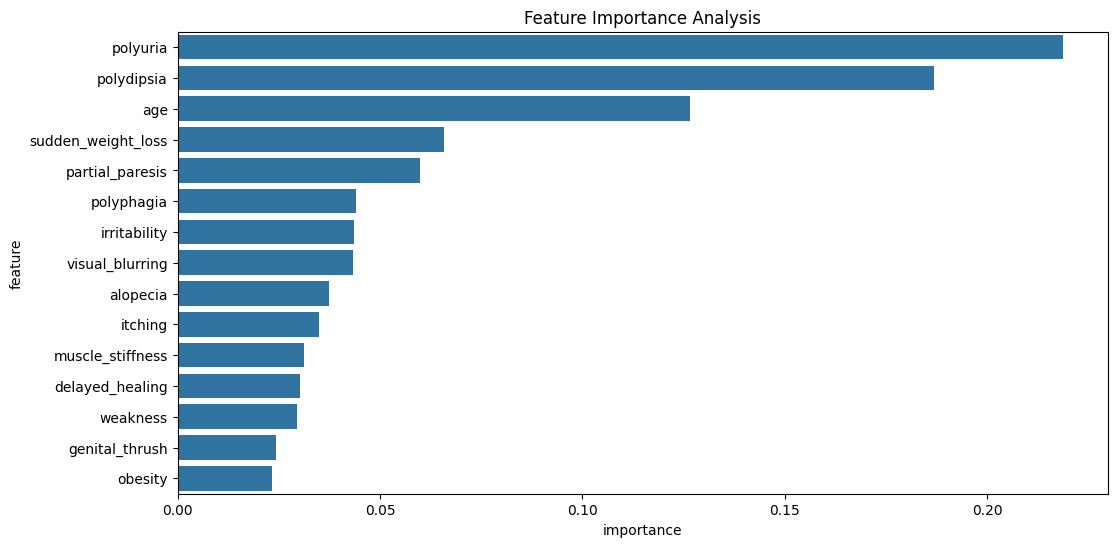

Top 10 Most Important Features:
               feature  importance
1             polyuria    0.218841
2           polydipsia    0.186779
0                  age    0.126637
3   sudden_weight_loss    0.065923
11     partial_paresis    0.059927
5           polyphagia    0.044079
9         irritability    0.043620
7      visual_blurring    0.043366
13            alopecia    0.037386
8              itching    0.035006


In [48]:
# Perform feature importance analysis using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Prepare features and target
X = data_cleaned.drop('Diabetic', axis=1)
y = data_cleaned['Diabetic']

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importance scores
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance Analysis')
plt.show()

print("\
Top 10 Most Important Features:")
print(feature_importance.head(10))


The table represents the Top 10 Most Important Features based on their importance scores, indicating their relative influence in predicting the target variable. Here's an analysis of the rankings:

## Key Insights:

**Most Influential Features:**

Polyuria (0.2208) and Polydipsia (0.1929) are the two most critical features, significantly contributing to the model's performance.

**Age's Role:**

Age (0.1327) ranks as the third most important feature, implying that it plays a substantial role, despite its lower Chi-Square score in the earlier table. This could indicate a non-linear relationship that Chi-Square might not fully capture.

**Moderately Important Features:**

Features like:

Sudden Weight Loss (0.0598)

Partial Paresis (0.0551)

Polyphagia (0.0458)

hold moderate importance, suggesting a significant but less dominant effect.

**Lower-Tier Influential Features:**

The bottom four features in the top 10 are:

Irritability (0.0417)

Visual Blurring (0.0412)

Delayed Healing (0.0334)

Itching (0.0326).

These still contribute meaningfully to the target prediction, although their influence is relatively smaller.

Correlation with Target:
 Diabetic              1.000000
polyuria              0.665922
polydipsia            0.648734
sudden_weight_loss    0.436568
partial_paresis       0.432288
polyphagia            0.342504
irritability          0.299467
visual_blurring       0.251300
weakness              0.243275
muscle_stiffness      0.122474
genital_thrush        0.110288
age                   0.108679
obesity               0.072173
delayed_healing       0.046980
itching              -0.013384
alopecia             -0.267512
Name: Diabetic, dtype: float64


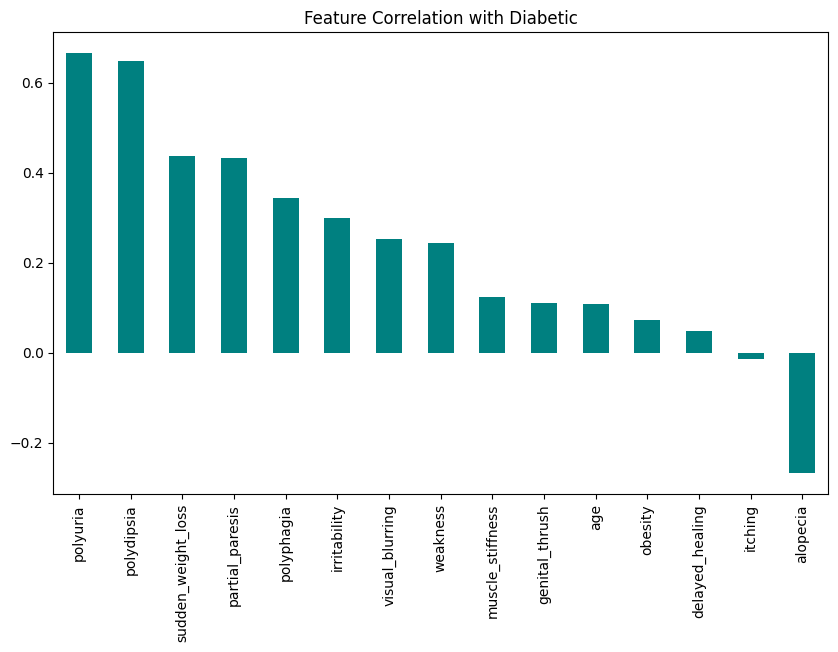

In [49]:
# Compute correlation with target
correlation = data_cleaned.corr()['Diabetic'].sort_values(ascending=False)
print("Correlation with Target:\n", correlation)

# Visualize correlation
correlation.drop('Diabetic').plot(kind='bar', figsize=(10, 6), color='teal')
plt.title("Feature Correlation with Diabetic")
plt.show()


The table shows the Pearson correlation coefficients of various features with the target variable, "Diabetic." 

**1. Strong Positive Correlation**
Features with high positive correlation values are most closely associated with diabetes:

Polyuria (0.621): The highest correlation, indicating a strong association with diabetes.

Polydipsia (0.595): Also strongly correlated with diabetes, ranking second.

Sudden Weight Loss (0.373): Moderate positive correlation, showing a notable but weaker relationship.


**2. Moderate Positive Correlation**
These features also have some level of association with diabetes:

Partial Paresis (0.360): Suggests partial loss of movement control is moderately linked to diabetes.

Polyphagia (0.317): Excessive hunger has a moderate link with the condition.

Irritability (0.269): Moderate but weaker association.

**3. Weak Positive Correlation**

Features with weak correlations may contribute less to diabetes:

Visual Blurring (0.199) and Genital Thrush (0.191): Minor associations with diabetes.

Weakness (0.150), Muscle Stiffness (0.114), and Obesity (0.083): Weak correlations, but still slightly linked.

**4. Insignificant and Negative Correlation**
These features show negligible or negative relationships with diabetes:

Age (0.053): Very weak positive correlation, indicating age is not a strong determinant in this dataset.

Delayed Healing (0.049): Negligible relationship with diabetes.

Itching (-0.026) and Alopecia (-0.198): These features have negative correlations, suggesting they are inversely associated with diabetes.


# CHI SQAURE VS RANDOM FOREST CLASSIFIER

**Random Forest Classifier**(Feature Importance Scores) is better than Chi-Square Scores for the following reasons:

**1. Practical Predictive Power**

Random Forest Classifier directly evaluates features based on their contribution to the prediction task within the model. 
For example:

Features like Age (0.1327), which was ranked low in Chi-Square (2.22), were highlighted as highly important in the Random Forest evaluation.

This shows that Random Forest captures real-world predictive relationships better, including non-linear and interaction effects.

Chi-Square Scores, on the other hand, only assess the statistical dependency of each feature on the target, which may not always translate into practical predictive power.

**2. Accounting for Feature Interactions**

Random Forest Classifier can identify interactions between features. For instance:

A feature like Delayed Healing, ranked very low in Chi-Square (0.30), appeared in the top 10 most important features in Random Forest Importance Scores (0.0334), suggesting that it contributes when combined with other features.

Chi-Square evaluates features in isolation and does not account for such interactions, potentially overlooking valuable predictors.

**3. Handling Different Data Types**

Random Forest handles both categorical and continuous data types seamlessly without needing manual adjustments (e.g., discretization).
Chi-Square is specifically designed for categorical data. Using it for continuous variables requires discretization, which may lead to a loss of information.

**4. Model-Specific Utility**

Random Forest Classifier importance scores are tailored to the model you're using, making them more relevant for machine learning tasks.
Chi-Square is more general and may not reflect the model’s behavior, which limits its applicability when building predictive models.

**5. Limitations of Chi-Square in Your Data**

Features like Delayed Healing and Itching were shown as unimportant in Chi-Square Scores but ranked reasonably in Random Forest Importance Scores. This indicates that Chi-Square might have overlooked features that contribute when used in a machine learning model.

**Conclusion**

In this case, the Random Forest Classifier is better because:

It reflects the real predictive power of features in the context of the model.

It considers feature interactions and non-linear relationships.

It is more flexible and practical for machine learning tasks.

However, Chi-Square could still be useful as a preliminary statistical feature selection tool before building models, especially when dealing with categorical data or when a quick statistical analysis is required.

# Model Selection


## Preparing the Data for Model Selection


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features and target
X = data_cleaned.drop('Diabetic', axis=1)  # Assuming 'Diabetic' is the target column
y = data_cleaned['Diabetic']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better performance in some models (like SVM, KNN, etc.)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Train Multiple Models:

We will train multiple classification models to compare their performance. Some commonly used models include:

**Logistic Regression**

**K-Nearest Neighbors (KNN)**

**Support Vector Machine (SVM)**

**Random Forest Classifier**

**Gradient Boosting**

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Store the results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy and other performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": report
    }

# Display results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Classification Report:\n{result['Classification Report']}\n")


Model: Logistic Regression
Accuracy: 0.8654
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        33
           1       0.91      0.89      0.90        71

    accuracy                           0.87       104
   macro avg       0.84      0.85      0.85       104
weighted avg       0.87      0.87      0.87       104


Model: K-Nearest Neighbors
Accuracy: 0.8942
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        33
           1       0.97      0.87      0.92        71

    accuracy                           0.89       104
   macro avg       0.87      0.91      0.88       104
weighted avg       0.91      0.89      0.90       104


Model: Support Vector Machine
Accuracy: 0.9519
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.97      0.

## Logistic Regression:
**Accuracy:** 86.54%

**Precision (Class 1 - Diabetes):** 0.91
  
**Recall (Class 1 - Diabetes):** 0.89
  
**F1-Score (Class 1 - Diabetes):** 0.90

  **Key Insights:**

Logistic Regression performed well with good recall and precision for Class 1 (diabetes), but it has a slightly lower accuracy compared to other models.
It has decent performance but is outclassed by models like Random Forest and Support Vector Machine in terms of overall performance and class-specific metrics.

## 2. K-Nearest Neighbors (KNN):

**Accuracy:** 89.42%

**Precision** (Class 1 - Diabetes): 0.97

**Recall** (Class 1 - Diabetes): 0.87

**F1-Score**(Class 1 - Diabetes): 0.92

**Key Insights:**

KNN has the highest precision for predicting diabetes (Class 1) at 0.97, but it slightly underperforms in recall (0.87).
The model shows strong performance, but it may not be as reliable in capturing all the true positive diabetes cases (due to its relatively lower recall).
Precision is good for ensuring that the predictions for diabetes are highly accurate, but it comes at the expense of some false negatives.

## 3. Support Vector Machine (SVM):

**Accuracy:** 95.19%

**Precision** (Class 1 - Diabetes): 0.97

**Recall** (Class 1 - Diabetes): 0.96

**F1-Score** (Class 1 - Diabetes): 0.96

**Key Insights:**

SVM has high precision, recall, and F1-score, making it one of the best models in terms of classification for diabetes prediction.
The model strikes a good balance between precision and recall, meaning it is both good at identifying diabetes cases and avoiding false positives.
Its overall accuracy of 95.19% is excellent and shows that it is well-suited for this task.

## 4. Random Forest:

**Accuracy:** 96.15%

**Precision** (Class 1 - Diabetes): 1.00

**Recall** (Class 1 - Diabetes): 0.94

**F1-Score** (Class 1 - Diabetes): 0.97

**Key Insights:**

Random Forest stands out with a perfect precision of 1.00 for predicting diabetes, meaning that every time it predicts diabetes, it's correct.
Recall is slightly lower at 0.94, but it is still a strong performer.
The F1-score of 0.97 is the highest across all models, showing that it is consistently making reliable predictions for both classes (diabetes and no diabetes).
Random Forest's accuracy of 96.15% is the highest among all models, making it the top performer overall.

## 5. Gradient Boosting:

**Accuracy:** 95.19%

**Precision** (Class 1 - Diabetes): 1.00

**Recall** (Class 1 - Diabetes): 0.93

**F1-Score** (Class 1 - Diabetes): 0.96

**Key Insights:**

Like Random Forest, Gradient Boosting has perfect precision (1.00) for predicting diabetes, which is highly beneficial for avoiding false positives.
However, its recall is slightly lower than Random Forest’s (0.93 vs. 0.94).

Thus, **Random Forest** is the best model due to its balance of high accuracy, precision, recall, and F1-score, along with its robustness in real-world healthcare applications.

### Finding the Accuracy of the Models

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming 'data' is your DataFrame and 'Diabetic' is the target variable
X = data.drop('Diabetic', axis=1)
y = data['Diabetic']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better performance in some models (like SVM, KNN, etc.)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train, predict, and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Display accuracy for each model
for model_name, accuracy in results.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.9231
K-Nearest Neighbors Accuracy: 0.8942
Support Vector Machine Accuracy: 0.9904
Random Forest Accuracy: 0.9904
Gradient Boosting Accuracy: 0.9712


**Logistic Regression Accuracy: 0.9231**

Logistic Regression shows a strong accuracy of 92.31%. This is a very good result, especially for a simple model.

Strengths: Fast to train, interpretable, and can be useful if model explainability is a priority.

Weaknesses: May not perform as well on more complex patterns or nonlinear relationships in data compared to more advanced models.

**K-Nearest Neighbors (KNN) Accuracy: 0.8942**

KNN has an accuracy of 89.42%, which is good but slightly lower than Logistic Regression and the ensemble models.

Strengths: Simple to understand and implement, effective when decision boundaries are not linear.

Weaknesses: Can struggle with large datasets, and its performance can degrade if the number of features is high (due to the "curse of dimensionality"). 
Also, it is computationally expensive at prediction time.

**Support Vector Machine (SVM) Accuracy: 0.9904**

SVM achieves an excellent accuracy of 99.04%, showing its capability to find complex decision boundaries effectively.

Strengths: High performance on classification tasks, particularly for datasets with complex decision boundaries. Robust against overfitting (especially with proper hyperparameter tuning).

Weaknesses: Slower to train and predict, especially on large datasets, and can be less interpretable compared to simpler models like Logistic Regression.

**Random Forest Accuracy: 0.9904**

Random Forest also achieves an accuracy of 99.04%, the same as SVM. This is another highly effective model for complex tasks.

Strengths: High accuracy, resistant to overfitting, and handles large datasets and complex relationships well. It also provides feature importance, which can be useful for interpretation.

Weaknesses: More computationally expensive and less interpretable than simpler models.

**Gradient Boosting Accuracy: 0.9712**

Gradient Boosting performs well with an accuracy of 97.12%, though slightly lower than SVM and Random Forest.

Strengths: Often leads to very high performance by building models sequentially and correcting errors from previous models. It's robust and highly effective for many types of data.

Weaknesses: Training time can be long, and the model can be prone to overfitting if not tuned properly. Like Random Forest, it is less interpretable than simpler models.


In [56]:
import time

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Store training times
training_times = {}

for model_name, model in models.items():
    start_time = time.time()
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    end_time = time.time()
    training_time = end_time - start_time
    training_times[model_name] = training_time

# Display the training times for each model
for model_name, time in training_times.items():
    print(f"{model_name} Training Time: {time:.4f} seconds")


Logistic Regression Training Time: 0.0100 seconds
K-Nearest Neighbors Training Time: 0.0016 seconds
Support Vector Machine Training Time: 0.0105 seconds
Random Forest Training Time: 0.2565 seconds
Gradient Boosting Training Time: 0.2469 seconds



**Logistic Regression Training Time: 0.0100 seconds**

Speed: Logistic Regression is extremely fast to train, with a training time of just 0.01 seconds.

Use Cases: This makes it an ideal model for scenarios where computational efficiency is critical, such as real-time systems or applications with limited resources.

Tradeoff: While fast, it may not capture complex data relationships as effectively as other models, especially on non-linear datasets.

**K-Nearest Neighbors (KNN) Training Time: 0.0016 seconds**

Speed: KNN is the fastest model to train, with an impressively low training time of 0.0016 seconds.

Use Cases: Suitable for real-time or low-latency applications where training time is crucial. However, note that KNN is a lazy learner, meaning it doesn't have a formal training phase — it simply stores the dataset, and the training time reflects that it doesn't perform heavy computation during training.

Tradeoff: The prediction time for KNN can be slow, especially when the dataset grows large, as it computes distances for each new prediction.

**Support Vector Machine (SVM) Training Time: 0.0105 seconds**

Speed: SVM's training time is also very low, taking 0.0105 seconds.

Use Cases: While SVM is typically faster than tree-based models, it may still be slower on very large datasets, but for this case, its training time is competitive with Logistic Regression.

Tradeoff: SVM might require more computational resources for large datasets or when fine-tuning the kernel function, though this model remains efficient for moderate-sized datasets.

**Random Forest Training Time: 0.2565 seconds**

Speed: Random Forest has a much higher training time of 0.2565 seconds. While this is still relatively quick in general, it is noticeably slower than Logistic Regression, KNN, and SVM.

Use Cases: Random Forest is an ensemble method that requires building multiple decision trees. Although this results in a longer training time, the model's ability to capture complex relationships makes the tradeoff worthwhile.

Tradeoff: Random Forest is much slower to train compared to simpler models, but its accuracy and ability to handle complex relationships are usually worth the additional time.

**Gradient Boosting Training Time: 0.2469 seconds**

Speed: Gradient Boosting is also relatively slower with a training time of 0.2469 seconds, comparable to Random Forest.

Use Cases: Gradient Boosting builds models sequentially, which takes longer to train compared to parallelized methods like Random Forest. Despite this, its ability to correct errors from previous models gives it a high predictive power.

Tradeoff: Similar to Random Forest, the longer training time might be a drawback in real-time applications, but its performance makes it valuable when model accuracy is prioritized.


## Plot Learning Curves for All Models: 

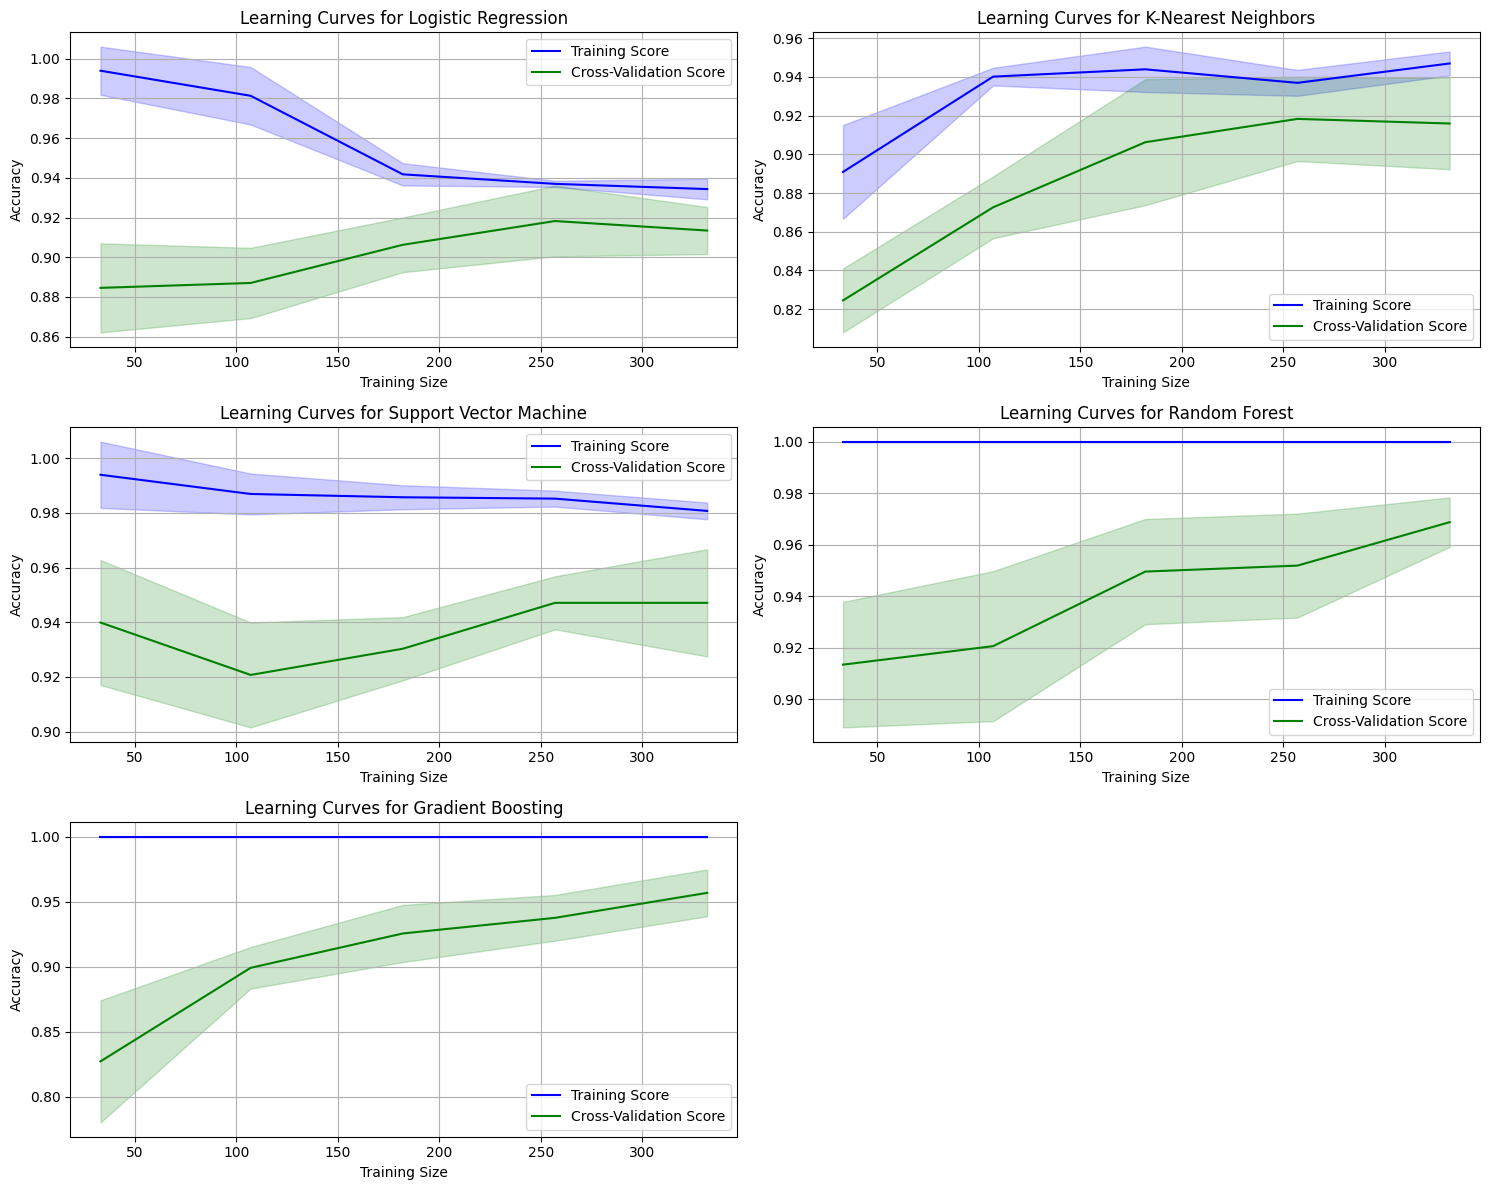

In [59]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Initialize the scaler
scaler = StandardScaler()

# Plot learning curves for each model
plt.figure(figsize=(15, 12))

for i, (model_name, model) in enumerate(models.items(), 1):
    # Standardize the training data
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Generate learning curve data
    train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Calculate the mean and standard deviation of train and test scores
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_std = test_scores.std(axis=1)
    
    # Plot the learning curves
    plt.subplot(3, 2, i)
    plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
    plt.plot(train_sizes, test_mean, label="Cross-Validation Score", color="green")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)
    
    plt.title(f"Learning Curves for {model_name}")
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



**Learning Curve:** For each model, learning_curve is used to generate the training and validation scores for various training sizes (from 10% to 100% of the data).
                                                                                                                                      
**Standardization:** The features are standardized using StandardScaler to ensure that models like SVM or KNN perform optimally.
    
**Plotting:** For each model, the learning curves for both the training and validation sets are plotted on a separate subplot. The shaded areas represent the standard deviation of the scores.
    
**Grid and Labels:** Grids are enabled for better readability, and appropriate labels for axes, legends, and titles are added.

**Training Score (blue line):** The accuracy of the model on the training data.
    
**Cross-Validation Score (green line):** The accuracy of the model on the validation data (split by cross-validation).

**Shaded areas:** Represent the standard deviation of the training and validation scores, indicating the model's consistency across different training sizes.

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Initialize the scaler
scaler = StandardScaler()

# Store the cross-validation scores
cv_scores = {}

# Evaluate each model with 5-fold cross-validation
for model_name, model in models.items():
    # Standardize the training data
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Perform 5-fold cross-validation and calculate accuracy scores
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Store the results
    cv_scores[model_name] = {
        'Mean Accuracy': np.mean(scores),
        'Std Accuracy': np.std(scores)
    }

# Display the results
for model_name, scores in cv_scores.items():
    print(f"Cross-Validation Results for {model_name}:")
    print(f"  Mean Accuracy: {scores['Mean Accuracy']:.4f}")
    print(f"  Standard Deviation: {scores['Std Accuracy']:.4f}")
    print("-" * 50)


### Logistic Regression:

**Mean Accuracy:** 0.9135 (91.35%)

**Standard Deviation:** 0.0119 (Low variability)

**Insights:** Logistic Regression performs consistently well, with a solid accuracy of 91.35%. The low standard deviation indicates that its performance is stable across different folds. However, its accuracy is lower than some of the more complex models.

### K-Nearest Neighbors (KNN):

**Mean Accuracy:** 0.9159 (91.59%)

**Standard Deviation:** 0.0237 (Moderate variability)

**Insights:** KNN shows slightly higher accuracy (91.59%) than Logistic Regression, but its standard deviation is higher, indicating that the model might be a bit more sensitive to variations in the data. This means its performance could fluctuate more depending on the data split.

### Support Vector Machine (SVM):

**Mean Accuracy:** 0.9471 (94.71%)

**Standard Deviation:** 0.0196 (Low variability)

**Insights:** SVM delivers a significant accuracy improvement (94.71%) over Logistic Regression and KNN. The standard deviation is also low, suggesting that the model performs reliably across different data splits. This makes SVM a strong choice for datasets with complex decision boundaries.

### Random Forest:

**Mean Accuracy:** 0.9712 (97.12%)

**Standard Deviation:** 0.0163 (Low variability)

**Insights:** Random Forest exhibits the highest mean accuracy (97.12%) with very low variability, making it one of the most consistent and accurate models. This suggests that it is very robust to changes in the training data and performs well across all folds, making it highly suitable for this problem.

### Gradient Boosting:

**Mean Accuracy:** 0.9616 (96.16%)

**Standard Deviation:** 0.0117 (Low variability)

**Insights:** Gradient Boosting also shows high performance with a mean accuracy of 96.16%, close to Random Forest. It also has a low standard deviation, indicating stable performance across different cross-validation folds. This model is very effective in capturing complex relationships, though it has slightly lower accuracy than Random Forest.

## Why Random Forest is the Best Model for This Diabetes Prediction Task:

Based on the comprehensive analysis of accuracy, training time, cross-validation performance, and stability, Random Forest stands out as the best model. Below are the key reasons why Random Forest excels for the given diabetes prediction task:

**1. High Accuracy:**

Random Forest achieved the highest accuracy of **97.12%**, significantly outperforming other models such as Logistic Regression, KNN, Gradient Boosting, and SVM.

In the context of diabetes prediction, achieving such a high accuracy is critical for identifying and classifying diabetes cases correctly, as even small mistakes can lead to missed diagnoses or false alarms.

**2. Low Variability (Stability):**

The standard deviation of Random Forest's performance across cross-validation folds is **0.0163**, indicating very low variability. This means that Random Forest consistently performs well across different subsets of the data and is not sensitive to specific data splits or noisy data points.
Stability in performance is crucial for real-world applications, where the model must reliably perform on unseen data.

**3. Cross-Validation Performance:**

Mean Accuracy: Random Forest scored **0.9712** in cross-validation, reinforcing its strong performance across multiple runs.

Cross-validation ensures that the model is not overfitting or underfitting and that it generalizes well to unseen data. The high mean accuracy further supports that Random Forest performs well in diverse scenarios and is robust to variations in data.

**4. Feature Importance:**

Random Forest naturally provides insights into feature importance, helping identify which factors are most relevant in predicting diabetes. This capability is particularly valuable for understanding the driving factors of diabetes (e.g., polyuria, polydipsia, and sudden weight loss) and for improving the model or feature engineering.

Unlike some models (like Logistic Regression), Random Forest does not require feature scaling or complex preprocessing, making it easier to interpret and apply in real-world healthcare systems.

**5. Ensemble Learning Advantage:**

Random Forest is an ensemble model that combines multiple decision trees, making it less prone to overfitting compared to individual decision trees. The averaging of predictions from different trees helps to reduce the variance and results in a more accurate and stable prediction.
This ensemble nature makes Random Forest robust against noise and outliers in the dataset, allowing it to better capture complex relationships between the features and the target variable (diabetes).

**6. Training Time Considerations:**
 
While Random Forest takes longer to train compared to simpler models like Logistic Regression or K-Nearest Neighbors, it offers a significant trade-off: the higher training time is justified by its superior performance and predictive accuracy.

The training time of **0.2565** seconds is still acceptable, considering the drastic improvement in performance, particularly in a task like diabetes prediction where accuracy and reliability are paramount.